<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#デザインパターン" data-toc-modified-id="デザインパターン-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>デザインパターン</a></span><ul class="toc-item"><li><span><a href="#Composite" data-toc-modified-id="Composite-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Composite</a></span></li><li><span><a href="#Strategy" data-toc-modified-id="Strategy-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Strategy</a></span></li><li><span><a href="#Decorator" data-toc-modified-id="Decorator-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Decorator</a></span></li><li><span><a href="#Factory-Method" data-toc-modified-id="Factory-Method-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Factory Method</a></span></li></ul></li><li><span><a href="#Adapter" data-toc-modified-id="Adapter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Adapter</a></span><ul class="toc-item"><li><span><a href="#継承を用いたパターン" data-toc-modified-id="継承を用いたパターン-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>継承を用いたパターン</a></span></li><li><span><a href="#委譲を用いたパターン" data-toc-modified-id="委譲を用いたパターン-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>委譲を用いたパターン</a></span></li></ul></li><li><span><a href="#Iterator" data-toc-modified-id="Iterator-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Iterator</a></span></li></ul></div>

# デザインパターン

参考にしたサイト  
https://qiita.com/nirperm/  
http://atsuya046.hatenablog.com/  
https://python.civic-apps.com/  
https://ja.wikipedia.org/wiki/  

## Composite

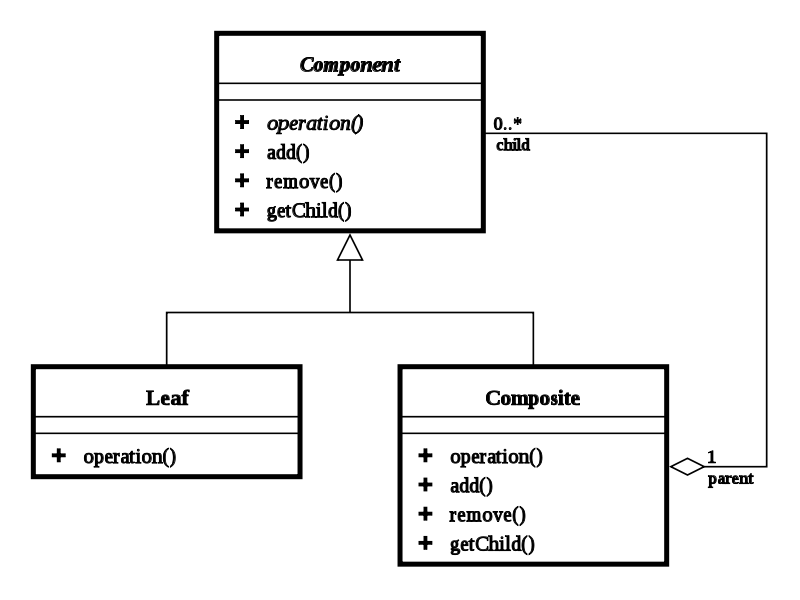

In [54]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Composite_UML_class_diagram.svg/800px-Composite_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

1つの抽象クラスがプリミティブとコンテナの両方を表すこと。

幸いな事に、Compositeパターンには犯しやすい間違いが１つしかありません。
そして悪い事に、多くの人がその間違いをよく犯します。
ツリーの深さが１段しかない、
つまりコンポジットオブジェクトの子コンポーネントが全て葉オブジェクトである
と想定してしまうのです。

Compositeパターンには、一つの決断をしなくてはいけません。

つまり、葉のオブジェクトでadd_sub_taskやremove_sub_taskをどう扱うかです。

1. 子を扱わないのだから、add_sub_task等は実装しない
1. add_sub_task等を呼び出そうとしたら例外を投げる
1. add_sub_task等を呼び出しても無視する

Compositeパターンのゴールは、全階層のオブジェクトを同じように扱えるようにする事です。
しかし、葉とコンポジットオブジェクトは同じではないのです。
『Rubyによるデザインパターン』の作者は１．（実装しない）が良いという意見です。


In [2]:
class Graphic:
    def render(self):
        raise NotImplementedError("You should implement this.")

class CompositeGraphic(Graphic):
    def __init__(self):
        self.graphics = []

    def render(self):
        #再帰的にrender()を呼び出す
        for graphic in self.graphics:
            graphic.render()

    def add(self, graphic):
        self.graphics.append(graphic)

    def remove(self, graphic):
        self.graphics.remove(graphic)

class Ellipse(Graphic):
    def __init__(self, name):
        self.name = name

    def render(self):
        print("Ellipse: {}".format(self.name))

if __name__ == '__main__':
    ellipse1 = Ellipse("1")
    ellipse2 = Ellipse("2")
    ellipse3 = Ellipse("3")
    ellipse4 = Ellipse("4")

    graphic1 = CompositeGraphic()
    graphic2 = CompositeGraphic()

    graphic1.add(ellipse1)
    graphic1.add(ellipse2)
    graphic1.add(ellipse3)
    graphic2.add(ellipse4)

    graphic = CompositeGraphic()

    graphic.add(graphic1)
    graphic.add(graphic2)

    graphic.render()

Ellipse: 1
Ellipse: 2
Ellipse: 3
Ellipse: 4


## Strategy

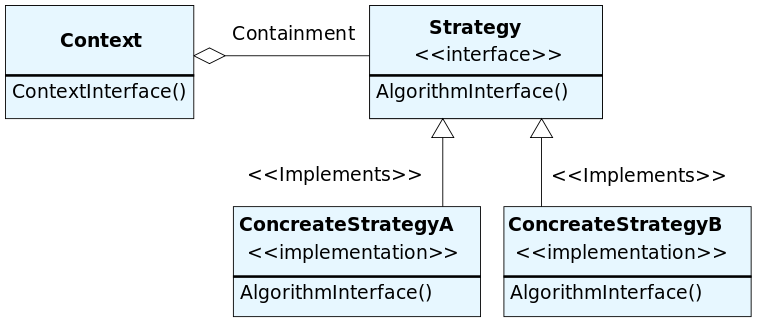

In [53]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/StrategyPatternClassDiagram.svg/757px-StrategyPatternClassDiagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

状況によってアルゴリズムを変更する必要がある場合に有効。  
if分の分岐内にアルゴリズムをかき分ける必要がなくなる。

各アルゴリズムをカプセル化しアルゴリズムを呼び出すインターフェイスのみ提供する。  
クライアントはそのアルゴリズムの実装については知っている必要がない。

In [14]:
from abc import ABCMeta, abstractmethod

class AbstractStrategy:
    def __init__(self):
        pass
        
    @abstractmethod
    def execute(self):
        pass

class ConcreteStrategy1(AbstractStrategy):
    def __init__(self):
        pass
    
    def execute(self):
        print('execute 1')

class ConcreteStrategy2(AbstractStrategy):
    def __init__(self):
        pass
        
    def execute(self):
        print('execute 2')
        
class Context():
    def __init__(self, strategy):
        self.strategy = strategy

    def execute(self):
        self.strategy.execute();
        
if __name__ == '__main__':
    context1 = Context(ConcreteStrategy1())
    context2 = Context(ConcreteStrategy2())

    context1.execute()
    context2.execute()

execute 1
execute 2


## Decorator

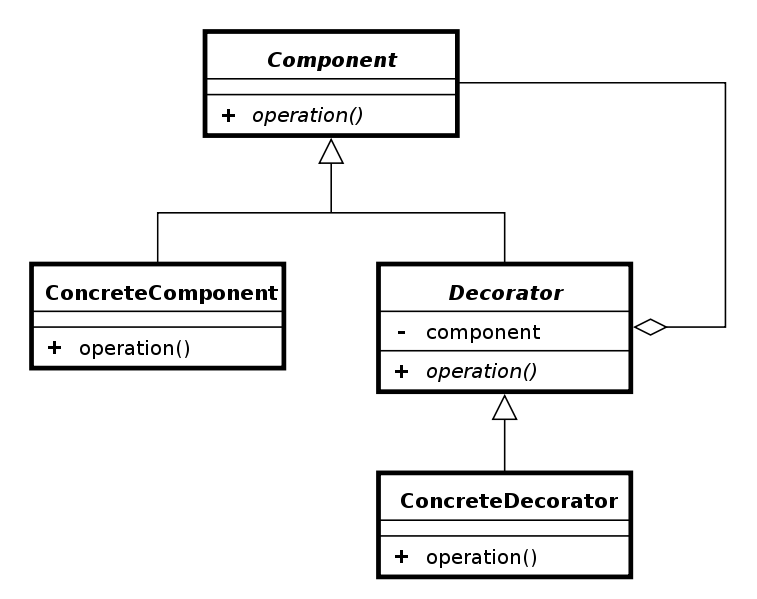

In [55]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Decorator_UML_class_diagram.svg/757px-Decorator_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

既存のオブジェクトを新しい Decorator オブジェクトでラップすることである。   
その方法として、Decorator のコンストラクタの引数でラップ対象の Component オブジェクトを読み込み、  
コンストラクタの内部でそのオブジェクトをメンバに設定する。
Decorator パターンは、既存のクラスを拡張する際にクラスの継承の代替手段として用いられる。  
継承がコンパイル時に機能を拡張するのに対し、Decorator パターンはプログラムの実行時に機能追加をする点が異なる。

In [18]:
class TextTag(object):
    """Represents a base text tag"""
    def __init__(self, text):
        self._text = text

    def render(self):
        return self._text

class BoldWrapper(TextTag):
    """Wraps a tag in <b>"""
    def __init__(self, wrapped):
        self._wrapped = wrapped

    def render(self):
        return "<b>{}</b>".format(self._wrapped.render())

class ItalicWrapper(TextTag):
    """Wraps a tag in <i>"""
    def __init__(self, wrapped):
        self._wrapped = wrapped

    def render(self):
        return "<i>{}</i>".format(self._wrapped.render())

if __name__ == '__main__':
    simple_hello = TextTag("hello, world!")
    bold_hello = BoldWrapper(simple_hello)
    special_hello = ItalicWrapper(bold_hello)
    print(simple_hello.render())
    print(bold_hello.render())
    print(special_hello.render())

hello, world!
<b>hello, world!</b>
<i><b>hello, world!</b></i>


## Factory Method

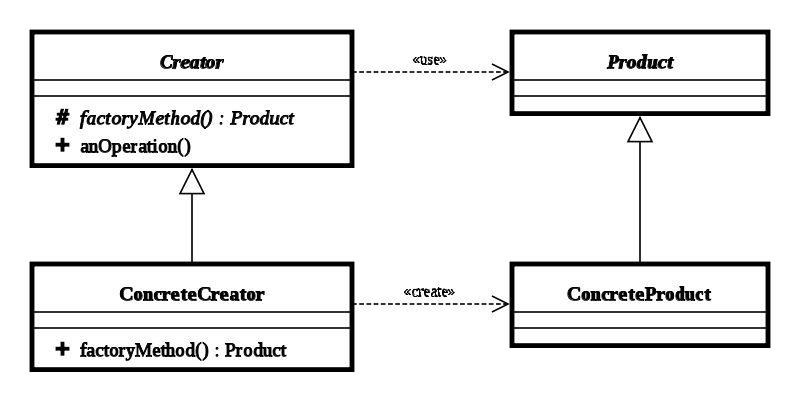

In [20]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Factory_Method_UML_class_diagram.svg/800px-Factory_Method_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

既存のオブジェクトを新しい Decorator オブジェクトでラップすることである。   
その方法として、Decorator のコンストラクタの引数でラップ対象の Component オブジェクトを読み込み、  
コンストラクタの内部でそのオブジェクトをメンバに設定する。
Decorator パターンは、既存のクラスを拡張する際にクラスの継承の代替手段として用いられる。  
継承がコンパイル時に機能を拡張するのに対し、Decorator パターンはプログラムの実行時に機能追加をする点が異なる。

他のクラスのコンストラクタをサブクラスで上書き可能な自分のメソッドに置き換えることで、  
アプリケーションに特化したオブジェクトの生成をサブクラスに追い出し、クラスの再利用性を高めることを目的とする。

Virtual Constructor パターンとも呼ばれる

In [52]:
from abc import ABCMeta, abstractmethod

class Factory(metaclass=ABCMeta):
    '''Creator'''
    @abstractmethod
    def create(self, owner):
        pass

class Product(metaclass=ABCMeta):
    '''Product'''
    @abstractmethod
    def write(self):
        pass
    
class Word(Product):
    '''ConcreteProduct'''
    def __init__(self, word):
        self.word = word

    def write(self):
        return self.word

class UpperCaseFactory(Factory):
    '''ConcreteCreator'''
    def __init__(self):
        pass

    def create(self, word):
        print('"' + word + '"' + ' is created')
        return Word(word.upper())

if __name__ == '__main__':
    factory = UpperCaseFactory()
    word1 = factory.create('i')
    word2 = factory.create('am')
    word3 = factory.create('awesome!')

    print(' '.join([word1.write(), word2.write(), word3.write()]))

"i" is created
"am" is created
"awesome!" is created
I AM AWESOME!


# Adapter

既存のクラスに対して修正を加えることなく、インタフェースを変更することができる。  
Adapter パターンを実現するための手法として継承を利用した手法と委譲を利用した手法が存在する。

２つのクラス間に変換構造を作り、別の用途に使えるように変換する。  
Apdaterは中間層の役割で、使う方と、使われる方は中身を知らなくても良い。  
クラスで返すのか、インスタンスで返すのかの違いかな。

## 継承を用いたパターン

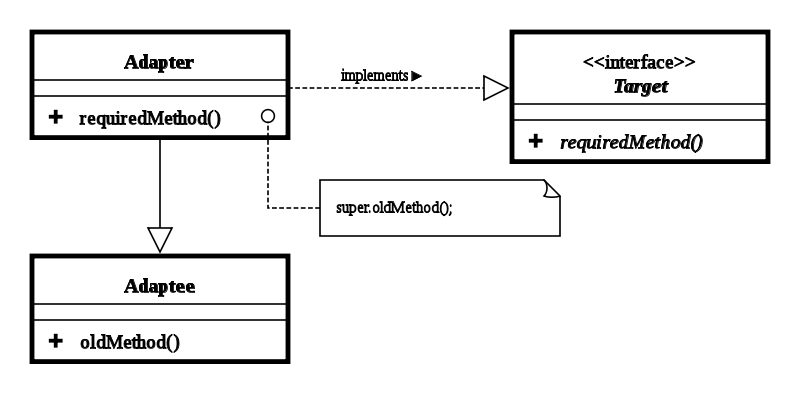

In [1]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Adapter_using_inheritance_UML_class_diagram.svg/800px-Adapter_using_inheritance_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

In [10]:
from abc import ABCMeta, abstractmethod

class Banner():

    def __init__(self, string):
        self.__string = string

    def show_with_paren(self):
        print('({0})'.format(self.__string))

    def show_with_aster(self):
        print('*{0}*'.format(self.__string))


class Printer(metaclass=ABCMeta):

    @abstractmethod
    def print_weak(self):
        pass

    @abstractmethod      
    def print_strong(self):
        pass    

class PrinterBanner(Banner):

    def __init__(self, string):
        super().__init__(string)

    def print_weak(self):
        self.show_with_paren()

    def print_strong(self):
        self.show_with_aster()
        
# 抽象クラスのPrinterへPrinterBanner登録
Printer.register(PrinterBanner)

if __name__ == '__main__':
    pb = PrinterBanner('Bye')
    pb.print_weak() 
    pb.print_strong()

(Bye)
*Bye*


## 委譲を用いたパターン

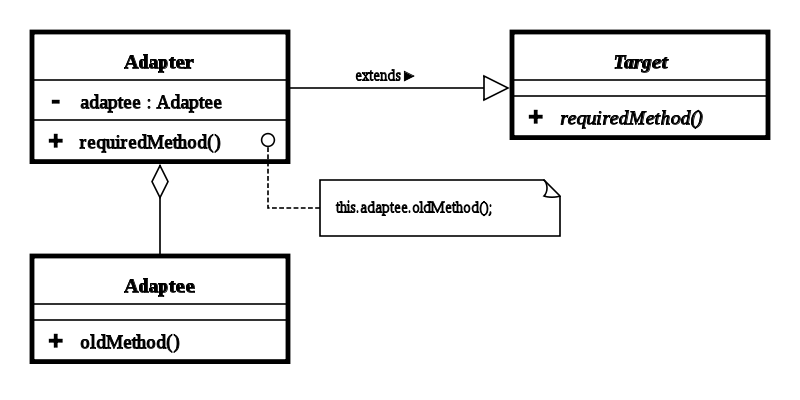

In [3]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Adapter_using_delegation_UML_class_diagram.svg/800px-Adapter_using_delegation_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

In [12]:
from abc import ABCMeta, abstractmethod

class Banner():

    def __init__(self, string):
        self.__string = string

    def show_with_paren(self):
        print('({0})'.format(self.__string))

    def show_with_aster(self):
        print('*{0}*'.format(self.__string))

class Printer(metaclass=ABCMeta):

    @abstractmethod
    def print_weak(self):
        pass

    @abstractmethod      
    def print_strong(self):
        pass    

class PrinterBanner(Printer):

    def __init__(self, string):
        self.banner = Banner(string)

    def print_weak(self):
        self.banner.show_with_paren()

    def print_strong(self):
        self.banner.show_with_aster()    
            
# 抽象クラスのPrinterへPrinterBanner登録
Printer.register(PrinterBanner)

if __name__ == '__main__':
    pb = PrinterBanner('Bye')
    pb.print_weak() 
    pb.print_strong()

(Bye)
*Bye*


# Iterator

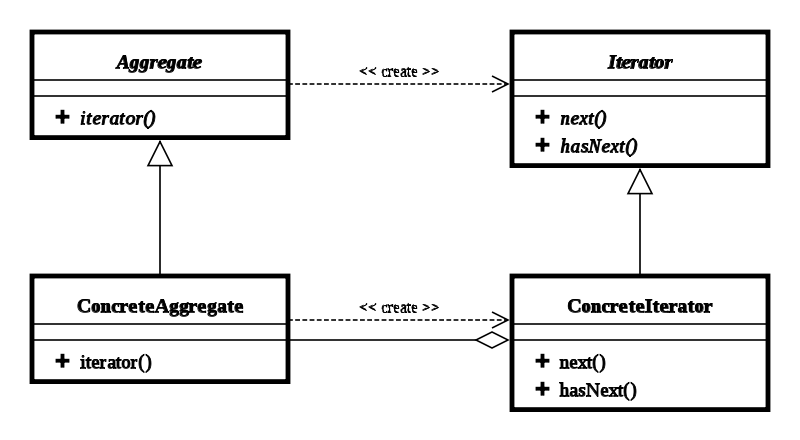

In [13]:
url='https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Iterator_UML_class_diagram.svg/800px-Iterator_UML_class_diagram.svg.png'

from IPython.display import Image
Image(url, width=600, height=500)

In [33]:
from abc import ABCMeta, abstractmethod

class Iterator(metaclass=ABCMeta):
    @abstractmethod
    def hasNext(self):
        pass
    
    @abstractmethod
    def next():
        pass

class ConcreteIterator(Iterator):
    def __init__(self, concreteAggregate):
        self.concreteAggregate = concreteAggregate
        self.index = 0
        
    def hasNext(self):
        if self.index < self.concreteAggregate.getSize():
            return True
        else:
            return False
        
    def next(self):
        self.index += 1
        return self.concreteAggregate.getItemAt(self.index - 1)

class Aggregate(metaclass=ABCMeta):
    @abstractmethod
    def iterator(self):
        pass
    
class ConcreteAggregate(Aggregate):
    def __init__(self):
        super()
        self.items = []
        
    def addItem(self, item):
        self.items.append(item)
        
    def getSize(self):
        return len(self.items)
    
    def getItemAt(self, index):
        return self.items[index]
    
    def iterator(self):
        return ConcreteIterator(self)

class Item():
    def __init__(self, name):
        self.name = name
        
    def Item(self, name):
        self.name = name
        
    def getName(self):
        return self.name;

if __name__ == '__main__':
    a = ConcreteAggregate()
    a.addItem(Item("A"))
    a.addItem(Item("B"))
    a.addItem(Item("C"))
    a.addItem(Item("D"))
    it = a.iterator()
    while it.hasNext():
        item = it.next()
        print(item.getName())

A
B
C
D
